In [1]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 

In [2]:
#data frame creation for movies, users and ratings files
movies_df = pd.read_csv('movies.dat', header=None, delimiter='::', 
                         engine='python')

In [3]:
#column name lists assignment
movies_col = ['MovieID','Title','Genres']
ratings_col = ['UserID','MovieID','Rating','Timestamp']
users_col = ['UserID','Gender','Age','Occupation','Zip-code']


In [4]:
movies_df.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
#data frame creation for movies, users and ratings files
movies_df = pd.read_csv('movies.dat', header=None, delimiter='::', 
                         engine='python', names=movies_col)
movies_df.dropna(inplace=True)
print(movies_df.head())


   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy


In [6]:
users_df = pd.read_csv('users.dat', header=None, delimiter='::',
                        engine='python', names=users_col)
users_df.dropna(inplace=True)
print(users_df.head())

   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455


In [7]:
ratings_df = pd.read_csv('ratings.dat', header=None,delimiter='::',
                          engine='python',names=ratings_col)
ratings_df.dropna(inplace=True)
print(ratings_df.head())

   UserID  MovieID  Rating    Timestamp
0       1   1193.0     5.0  978300760.0
1       1    661.0     3.0  978302109.0
2       1    914.0     3.0  978301968.0
3       1   3408.0     4.0  978300275.0
4       1   2355.0     5.0  978824291.0


In [8]:
#merging above dataframes into one dataframe to create master_data dataframe
master_data = ratings_df.merge(movies_df, on = ['MovieID'], how = 'outer')

In [11]:
master_data = master_data.merge(users_df, on = ['UserID'], how = 'outer')
master_data.dropna(inplace=True)
master_data.head()


,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender_x,Age_x,Occupation_x,Zip-code_x,Gender_y,Age_y,Occupation_y,Zip-code_y,Gender,Age,Occupation,Zip-code
0,1.0,1193.0,5.0,978300760.0,One Flew Over the Cuckoo's Nest (1975),Drama,F,1.0,10.0,48067,F,1.0,10.0,48067,F,1,10,48067
1,1.0,661.0,3.0,978302109.0,James and the Giant Peach (1996),Animation|Children's|Musical,F,1.0,10.0,48067,F,1.0,10.0,48067,F,1,10,48067
2,1.0,914.0,3.0,978301968.0,My Fair Lady (1964),Musical|Romance,F,1.0,10.0,48067,F,1.0,10.0,48067,F,1,10,48067
3,1.0,3408.0,4.0,978300275.0,Erin Brockovich (2000),Drama,F,1.0,10.0,48067,F,1.0,10.0,48067,F,1,10,48067
4,1.0,2355.0,5.0,978824291.0,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1.0,10.0,48067,F,1.0,10.0,48067,F,1,10,48067


In [12]:
# Exploratory Data Analysis

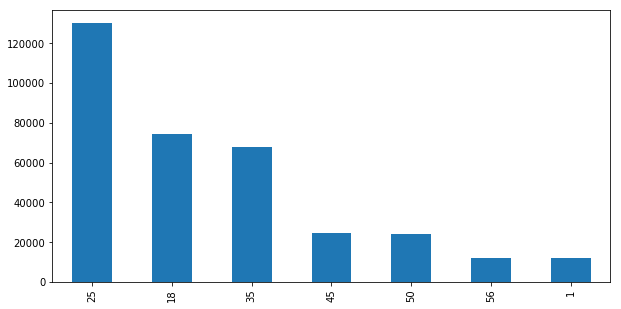

In [13]:
#User Age distribution using Histogram
master_data['Age'].value_counts().plot(kind='bar',figsize=(10,5))
plt.show()

Text(0.5, 0, 'Age')

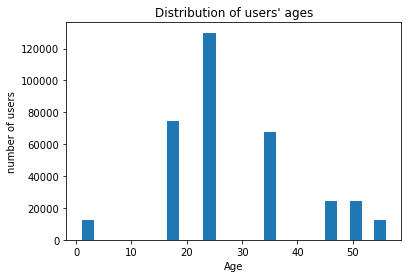

In [14]:
master_data.Age.plot.hist(bins=25)
plt.title("Distribution of users' ages")
plt.ylabel('number of users')
plt.xlabel('Age')

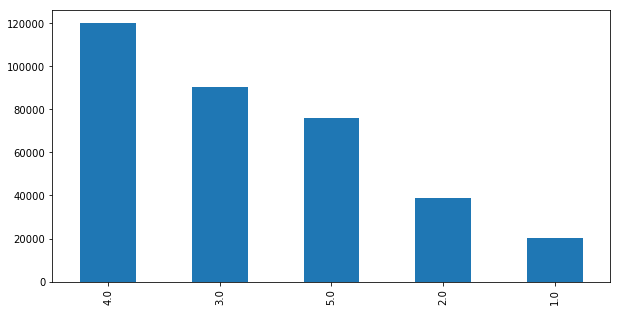

In [15]:
#Visualize overall rating by users
master_data['Rating'].value_counts().plot(kind='bar',figsize=(10,5))
plt.show()

In [16]:
master_data.loc[master_data['Age'] ==1, 'Age Group'] = 'Under 18'
master_data.loc[master_data['Age'] ==18, 'Age Group'] = '18-24'
master_data.loc[master_data['Age'] ==25, 'Age Group'] = '25-34'
master_data.loc[master_data['Age']==35, 'Age Group'] = '35-44'
master_data.loc[master_data['Age'] ==45, 'Age Group'] = '45-49'
master_data.loc[master_data['Age'] ==50, 'Age Group'] = '50-55'
master_data.loc[master_data['Age']==56, 'Age Group'] = '56+'


In [17]:
#User rating of the movie 'Toy story'
user_rating_toy_story = master_data[master_data.Title.str.contains('Toy Story')][['UserID','Title',
            'Rating']].groupby(['Title'])['Rating'].agg(['sum','count']).reset_index()
print(user_rating_toy_story)
user_rating_toy_story['Overall_Rating'] = (user_rating_toy_story['sum']/user_rating_toy_story['count']).round()
user_rating_toy_story.drop(columns='sum',axis=1,inplace=True)
user_rating_toy_story.rename(columns = {'count':'Number_of_votes'}, inplace=True)
print(user_rating_toy_story)


                Title     sum  count
0    Toy Story (1995)  2937.0    707
1  Toy Story 2 (1999)  2575.0    609
                Title  Number_of_votes  Overall_Rating
0    Toy Story (1995)              707             4.0
1  Toy Story 2 (1999)              609             4.0


In [18]:
#Top 25 movies by viewership rating
group_rating = master_data[['Title','Rating']].groupby('Title')['Rating'].agg(['sum','count']).reset_index()
group_rating.rename(columns = {'count':'Number_of_votes','sum':'Total_rating'}, inplace = True)
group_rating['Overall_rating'] = (group_rating['Total_rating']/group_rating['Number_of_votes']).round()
print(group_rating.head())
top_25_movies = group_rating.sort_values(by=['Overall_rating','Number_of_votes'], 
                         ascending = False)[['Title','Overall_rating']].head(25).reset_index()
top_25_movies.drop(columns='index',inplace=True,axis=1)
print(top_25_movies)


                           Title  Total_rating  Number_of_votes  \
0         $1,000,000 Duck (1971)          53.0               16   
1           'Night Mother (1986)          67.0               19   
2      'Til There Was You (1997)          67.0               25   
3             'burbs, The (1989)         300.0              103   
4  ...And Justice for All (1979)         202.0               56   

   Overall_rating  
0             3.0  
1             4.0  
2             3.0  
3             3.0  
4             4.0  
                                                Title  Overall_rating
0                      Raiders of the Lost Ark (1981)             5.0
1                             Schindler's List (1993)             5.0
2                    Shawshank Redemption, The (1994)             5.0
3                               Godfather, The (1972)             5.0
4                          Usual Suspects, The (1995)             5.0
5                          Wrong Trousers, The (1993)    

In [24]:
#ratings for all the movies reviewed by for a particular user of user id = 2696
movie_list = master_data[master_data['UserID']==2696]['MovieID'].tolist()

In [26]:
movies_for_2696 = master_data[master_data['MovieID'].isin(movie_list)][['Title','Rating']].groupby('Title')['Rating'].agg(['sum','count']).reset_index()
movies_for_2696['Overall_rating'] = (movies_for_2696['sum']/movies_for_2696['count']).round()
movies_for_2696.drop(columns=['sum','count'],axis=1,inplace=True)
print(movies_for_2696)


Empty DataFrame
Columns: [Title, Overall_rating]
Index: []


In [28]:
#Feature Engineering
movie_Genres_list = master_data.Genres.tolist()
movie_genre_list = [i]
i = 0
while(i<len(movie_Genres_list)):
    movie_genre_list+=movie_Genres_list[i].split('|')
    i+=1
    
print(movie_genre_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [29]:
unique_genre = list(set(movie_genre_list))
print(unique_genre)
print(len(unique_genre))

['Mystery', 'Drama', 'Adventure', 'Sci-Fi', 'Comedy', 'Film-Noir', 'Horror', 'Musical', 'Documentary', 'Thriller', 'War', 'Animation', 'Action', 'Crime', 'Fantasy', 'Western', "Children's", 'Romance', 345471]
19


In [30]:
new_data = pd.concat([master_data,master_data.Genres.str.get_dummies()], axis=1)
print(new_data.columns)


Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Title', 'Genres',
       'Gender_x', 'Age_x', 'Occupation_x', 'Zip-code_x', 'Gender_y', 'Age_y',
       'Occupation_y', 'Zip-code_y', 'Gender', 'Age', 'Occupation', 'Zip-code',
       'Age Group', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')


In [31]:
#df = new_data[['MovieID','Rating','Gender','Age Group','Occupation']]
df = new_data.drop(columns=['Title','Zip-code','Timestamp','Genres'])

print(df.head())


   UserID  MovieID  Rating Gender_x  Age_x  Occupation_x Zip-code_x Gender_y  \
0     1.0   1193.0     5.0        F    1.0          10.0      48067        F   
1     1.0    661.0     3.0        F    1.0          10.0      48067        F   
2     1.0    914.0     3.0        F    1.0          10.0      48067        F   
3     1.0   3408.0     4.0        F    1.0          10.0      48067        F   
4     1.0   2355.0     5.0        F    1.0          10.0      48067        F   

   Age_y  Occupation_y  ... Fantasy Film-Noir  Horror  Musical Mystery  \
0    1.0          10.0  ...       0         0       0        0       0   
1    1.0          10.0  ...       0         0       0        1       0   
2    1.0          10.0  ...       0         0       0        1       0   
3    1.0          10.0  ...       0         0       0        0       0   
4    1.0          10.0  ...       0         0       0        0       0   

   Romance  Sci-Fi  Thriller  War  Western  
0        0       0         0 

In [32]:
df.Occupation.value_counts()
df.set_index('MovieID', inplace = True)


In [33]:
X = df.drop(columns=['Rating'])
Y = df['Rating']

In [36]:
x1 = pd.get_dummies(data=X)
x2 = pd.get_dummies(X['Occupation'], prefix = 'Occupation')

MemoryError: 

In [37]:
X = pd.concat([x1,x2], axis=1)


NameError: name 'x1' is not defined

In [38]:
X.columns
X.drop(columns = ['Occupation','Gender_F','Age Group_56+','Occupation_20.0'],
       axis = 1, inplace=True)


KeyError: "['Gender_F' 'Age Group_56+' 'Occupation_20.0'] not found in axis"

In [39]:
X.head()

,UserID,Gender_x,Age_x,Occupation_x,Zip-code_x,Gender_y,Age_y,Occupation_y,Zip-code_y,Gender,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
MovieID,,,,,,,,,,,,,,,,,,,,,
1193.0,1.0,F,1.0,10.0,48067,F,1.0,10.0,48067,F,...,0,0,0,0,0,0,0,0,0,0
661.0,1.0,F,1.0,10.0,48067,F,1.0,10.0,48067,F,...,0,0,0,1,0,0,0,0,0,0
914.0,1.0,F,1.0,10.0,48067,F,1.0,10.0,48067,F,...,0,0,0,1,0,1,0,0,0,0
3408.0,1.0,F,1.0,10.0,48067,F,1.0,10.0,48067,F,...,0,0,0,0,0,0,0,0,0,0
2355.0,1.0,F,1.0,10.0,48067,F,1.0,10.0,48067,F,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
XY = pd.concat([X,Y], axis=1)
XY.head()
XY.corr()
sns.heatmap(XY.corr())
sns.pairplot(XY.corr())

MemoryError: 

In [ ]:
X = X[1000:].values
Y = Y[1000:].values
train, test, train_labels, test_labels = train_test_split(X,Y,test_size=0.33,random_state=42)

In [ ]:
#applying decision tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = accuracy_score(test_labels, Y_pred)*100
print(acc_decision_tree) 